# Numérisation

Pour présenter en entrée d'une fonction une image ou un texte, il faut pouvoir le représenter sous forme numérique. \
Cette série d'exercices permet de préciser cette forme.

Mais avant, nous avons besoin :
- de charger le répertoire git du TD sur colab
- d'importer les fonctions qui nous serons utiles

In [5]:
! git clone https://github.com/nanopiero/intro-ia-secondes.git

Cloning into 'intro-ia-secondes'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 80 (delta 20), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (80/80), 3.29 MiB | 10.84 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [9]:
import numpy as np

def table(a):
  return np.array(a)

def repete(a,n):
  l = [a for i in range(a.shape[-1])]
  if len(a.shape) == 1:
    return np.stack(l)
  else:
    return np.concatenate(l, axis=len(a.shape) - 2)

def empile(L):
  return np.stack(L)


def transpose(a):
  return a.transpose()


def suite_arithmetique(n):
  return np.arange(0,n + 1)


**Exercice n°1** Manipulation de tables de nombres

In [ ]:
# Commande table : définition d'une ligne de nombres
a = table([1,2,3,4])
print(a)

In [ ]:
# Commande table : définition d'une table de nombres
b = table([[1,2],[3,4]])
print(b)

In [ ]:
# somme / produit de deux tables de nombres:
print(b + b)
print(b*b)

In [ ]:
# Commande "repete" :
c = repete(a, 3) # 3 fois
print(c)

d = repete(a, 3)

In [ ]:
# Commande "transpose" (échange les lignes et les colonnes) :
e = transpose(d) # 3 fois
print(e)

A vous de jouer : A  partir des exemples ci-dessus, construire la table d'addition et la table de multiplication des nombres de 1 à 10.

In [ ]:
# prompt: I neeed a code that display one 6 from the MNIST image set, through a pytorch dataset with no grid

import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

# Define the transform to convert the image to a tensor
transform = transforms.ToTensor()

# Load the MNIST dataset
dataset = MNIST(root='./data', train=True, download=True, transform=transform)

# Get the first image and label
image, label = dataset[6]

# Display the image
import matplotlib.pyplot as plt

plt.imshow(image.squeeze(), cmap='gray')
plt.show()


Exercice n°2 : une image oir et blanc

In [38]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the MNIST dataset
dataset_Lecun = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

def preleve_image(n, jeu_de_donnees):
  return np.array(jeu_de_donnees[n][0]).squeeze(), jeu_de_donnees[n][1]

(28, 28)


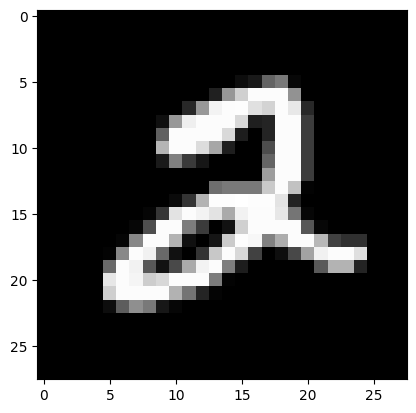

In [41]:
# Get the first image and label
image, label = preleve_image(5, dataset_Lecun)


afficher(image, width_cm=0)

**Exercice n°3** : une image couleur

In [37]:
from PIL import Image
import torch
import matplotlib.pyplot as plt

def afficher(image, width_cm=0):
  try:
    dpi = 96  # Default DPI for matplotlib
    width_inches = width_cm / 2.54
    height_inches = (image.height / image.width) * width_inches
    fig, ax = plt.subplots(figsize=(width_inches, height_inches), dpi=dpi)
    ax.imshow(image)
    ax.axis('off')
    plt.show()
  except:
    plt.imshow(image, cmap='gray')


def ouvrir(image):
    return np.array(Image.open(image))

# def conversion_image_table(image):
#     return np.array(image)

# def conversion_table_image(table):
#     return Image.fromarray(table)

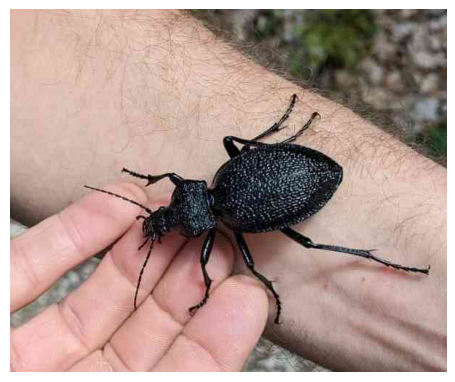

In [29]:
# Commande ouvrir et commande afficher :
chemin_image = 'intro-ia-secondes/images/Carabus.jpg'
image = ouvrir(chemin_image)

afficher(image)

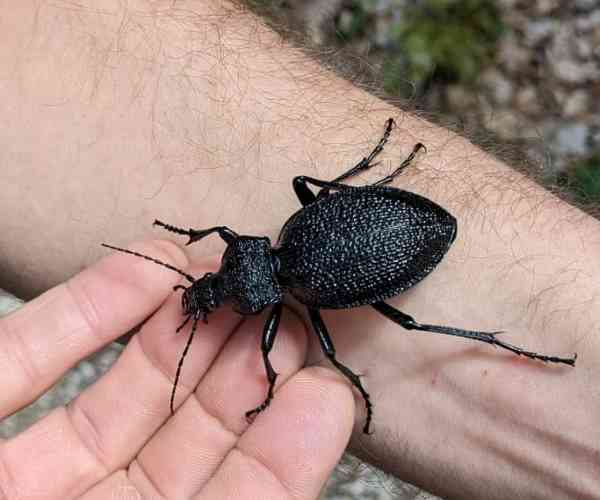

In [35]:
image

In [ ]:
# Commande conversion_image_table
x = conversion_image_table(image)

print(x) # tableau à triple entrée : empilement de trois tables rouge, vert, bleu

In [ ]:
# table des rouge :
print(x[0])

In [14]:
# modification de la table des rouges:
x[0] = transpose(x[0])
affiche(image)

ValueError: could not broadcast input array from shape (3,600) into shape (600,3)

Exercice n°3 : classer une image avec un réseau de neurones profond

In [99]:
# commande :
n = 10
a = suite_arithmetique(n)

print(a)

[ 0  1  2  3  4  5  6  7  8  9 10]


Exercice n°4: tokeniser un texte

Exercice n°5: classer un texte tokénisé avec un transformer

In [37]:
#

In [36]:
table([1,2,3])

NameError: name 'table' is not defined

Cloning into 'intro-ia-secondes'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 80 (delta 20), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (80/80), 3.29 MiB | 6.53 MiB/s, done.
Resolving deltas: 100% (20/20), done.


**Clonage du dépôt git :**

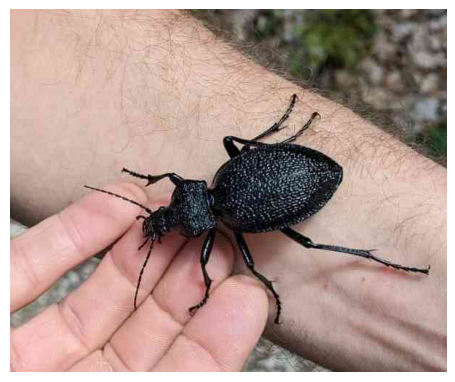

In [34]:
x = conversion_image_table(image)

In [35]:
x.shape

torch.Size([500, 600, 3])

In [ ]:
  def get_numpy_channels(self):
      return np.array(self.image)

  def set_channels(self, np_array):
      self.image = Image.fromarray(np_array)



  def switch_channels(self, channel_tuple):
      # A compléter
      pass

**A.** Appliquer le code suivant à *data/image.jpg*

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import copy

class ImageTransform:
    def __init__(self, image_path):
        self.image = Image.open(image_path)

    def get_numpy_channels(self):
        return np.array(self.image)

    def set_channels(self, np_array):
        self.image = Image.fromarray(np_array)

    def display_image(self, width_cm=15):
        dpi = 96  # Default DPI for matplotlib
        width_inches = width_cm / 2.54
        height_inches = (self.image.height / self.image.width) * width_inches
        fig, ax = plt.subplots(figsize=(width_inches, height_inches), dpi=dpi)
        ax.imshow(self.image)
        ax.axis('off')
        plt.show()

    def switch_channels(self, channel_tuple):
        # A compléter
        pass


# Example Usage
# image_transform = ImageTransform('path/to/image.jpg')
# image_transform.display_image()

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import copy

class ImageTransform:
    def __init__(self, image_path):
        self.image = Image.open(image_path)

    def get_numpy_channels(self):
        return np.array(self.image)

    def set_channels(self, np_array):
        self.image = Image.fromarray(np_array)

    def display_image(self, width_cm=15):
        dpi = 96  # Default DPI for matplotlib
        width_inches = width_cm / 2.54
        height_inches = (self.image.height / self.image.width) * width_inches
        fig, ax = plt.subplots(figsize=(width_inches, height_inches), dpi=dpi)
        ax.imshow(self.image)
        ax.axis('off')
        plt.show()

    def switch_channels(self, channel_tuple):
        np_array = self.get_numpy_channels()
        # channela = np_array[...,channel_tuple[0]]
        channela = copy.deepcopy(np_array[...,channel_tuple[0]])
        channelb = np_array[...,channel_tuple[1]]
        np_array[...,channel_tuple[0]] = channelb
        np_array[...,channel_tuple[1]] = channela
        self.set_channels(np_array)


In [ ]:
! ls

In [ ]:
path_to_image = 'apprentissage/data/image.jpg'
image_transform = ImageTransform(path_to_image)
image_transform.display_image()
channels = image_transform.get_numpy_channels()
print(channels.shape)

**B.** Compléter la méthode "switch_channel" pour intervertir les canaux rouge et bleu. Visualiser.   

In [ ]:
image_transform.set_channels(channels)
image_transform.switch_channels((0, 2))
image_transform.display_image()

**Exo n°3 (csv, pandas, statistiques de base)**

**A.** Charger temp_pointe_du_raz.csv (la bibliothèque pandas est conseillée). Convertir les températures en degré Celsius.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = 'apprentissage/data/temp_pointe_du_raz.csv'
df = pd.read_csv(file_path)

In [ ]:
# Convert the temperature from Kelvin to Celsius
df['temperature_celsius'] = df['temperature'] - 273.15
# Handle NaN values by dropping themb
# Print the first 100 values of temperature in Celsius
print(df['temperature_celsius'].head(100))

In [ ]:
# Handle NaN values by dropping them
df = df.dropna()

**B.** Tracer la frise chronologique des températures.

In [ ]:
# Display a chronological plot of the temperature for the N first values
def plot_temperature(N):
    plt.figure(figsize=(10, 5))
    plt.plot(pd.to_datetime(df['date'], format='%Y%m%d%H%M%S')[:N], df['temperature_celsius'][:N])
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Chronological Plot of Temperature for the First {N} Values')
    plt.show()

plot_temperature(1000)

**C.** Déterminer la moyenne, la médiane, et l'intervalle interquantile de la série statistique.

In [ ]:
# Print the mean, median and the difference between the 1st and 3rd quartiles
mean_temp = df['temperature_celsius'].mean()
median_temp = df['temperature_celsius'].median()
q1 = df['temperature_celsius'].quantile(0.25)
q3 = df['temperature_celsius'].quantile(0.75)
iqr = q3 - q1

print(f"Mean Temperature: {mean_temp} °C")
print(f"Median Temperature: {median_temp} °C")
print(f"Interquartile Range (IQR): {iqr} °C")

**D.** Y a-t-il une cyclicité dans la série ? Si oui la mettre en évidence.

In [ ]:
# Display the Fourier transform of the series, paying attention to the time axis
# Display the Fourier transform of the series, paying attention to the time axis
def plot_fourier_transform():
    temperature_series = df['temperature_celsius']
    n = len(temperature_series)
    fft = np.fft.fft(temperature_series - np.mean(temperature_series))
    fft_freq = np.fft.fftfreq(n, d=1)  # Assuming the time step is 1 hour

    plt.figure(figsize=(10, 5))
    plt.plot(fft_freq[:n // 2], np.abs(fft)[:n // 2])
    plt.xscale('log')
    plt.xlim([1/120, 1/5])  # Limiting to 1/5 hours
    plt.ylim([0, 40000])  # Limiting to 1/5 hours

    # Highlight specific frequencies
    highlighted_freqs = [1/48, 1/24, 1/12, 1/6]
    for freq in highlighted_freqs:
        plt.axvline(x=freq, color='red', linestyle='--')

    plt.xlabel('Frequency (1/hour)')
    plt.ylabel('Amplitude')
    plt.title('Fourier Transform of Temperature Series')
    plt.show()


plot_fourier_transform()

**Exo n°4 (json, dictionnaires, base de données)**

**A.** Chargez le json *data/annotations.json* dans un dictionnaire python.

In [ ]:
import json
# Load the JSON file into a Python dictionary
def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

file_path = 'apprentissage/data/annotations.json'
data = load_json(file_path)
print(data)

**B.** Ce dictionnaire associe des noms d'images (clefs) à des métadonnées ('filename', 'size', 'file_attributes') et des annotations (dans 'regions').
La plupart des images n'ont pas été annotées. Dans ce cas 'regions' est une liste vide. \
Supprimer toutes les clefs du dictionnaire pour lesquelles la sous-clef 'regions' est vide. Combien en reste-t-il ?   

In [ ]:
# Suppress all keys if the regions subkey is empty
def suppress_empty_regions(data):
    keys_to_remove = [key for key, value in data.items() if not value['regions']]
    for key in keys_to_remove:
        del data[key]
    return data


# Suppress empty regions
print(len(data))
data = suppress_empty_regions(data)
print(len(data))
print(data)

**C.** Importer la fonction *simplify_annotations* du module exos/utile.py. L'appliquer aux données.

In [ ]:
import os
os.chdir('apprentissage/exos')


In [ ]:
! cd apprentissage

In [ ]:
from utile import simplify_annotations
data = simplify_annotations(data)

In [ ]:
print(data)

**D.** Stocker les données contenues dans la sortie de *simplify_annotations* dans une base de données sqlite locale. Cette base doit contenir trois colonnes 'name_image', 'size' et 'regions'. Chaque ligne correspondra à une image.

In [ ]:
import sqlite3


# Connect to SQLite database (or create it if it doesn't exist)
db_path = 'image_data.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Create table
cursor.execute('''
CREATE TABLE IF NOT EXISTS images (
    name_image TEXT PRIMARY KEY,
    size INTEGER,
    regions TEXT
)
''')

# Insert data into the table
for name_image, attributes in data.items():
    cursor.execute('''
    INSERT INTO images (name_image, size, regions)
    VALUES (?, ?, ?)
    ''', (name_image, attributes['size'], attributes['regions']))

# Commit the transaction
conn.commit()

# Close the connection
conn.close()

print("Data has been successfully inserted into the SQLite database.")

In [ ]:
# Install sqlite3
!apt-get update
!apt-get install sqlite3 -y


In [ ]:
! sqlite3 image_data.db "SELECT * FROM images;"